In [1]:
import pandas as pd
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic dataset with 5 columns
num_samples = 1000

# Randomly generate input features
age = np.random.randint(18, 65, num_samples)
gender = np.random.choice(['Male', 'Female'], num_samples)
income = np.random.uniform(20000, 100000, num_samples)
product_category = np.random.choice(['Electronics', 'Clothing', 'Books'], num_samples)
promotion = np.random.choice(['Yes', 'No'], num_samples)

# Generate target variable
sales = 50 + 20 * age + 15 * (gender == 'Female') + 0.5 * income + \
        (product_category == 'Electronics') * 30 + (promotion == 'Yes') * 20 + np.random.normal(0, 100, num_samples)

# Create a DataFrame to store the dataset
dataset = pd.DataFrame({
    'Age': age,
    'Gender': gender,
    'Income': income,
    'Product_Category': product_category,
    'Promotion': promotion,
    'Sales': sales
})

In [2]:
# Save the dataset to a CSV file
print(dataset)
dataset.to_csv('synthetic_dataset.csv', index=False)

     Age  Gender        Income Product_Category Promotion         Sales
0     56    Male  74663.630129            Books       Yes  38626.266463
1     46  Female  55672.216510         Clothing        No  28874.826098
2     32  Female  41890.133303      Electronics        No  21751.329500
3     60  Female  99769.960013            Books       Yes  51245.934653
4     25    Male  54094.504179         Clothing        No  27502.309657
..   ...     ...           ...              ...       ...           ...
995   22    Male  28857.647466            Books       Yes  14941.734004
996   40    Male  53803.874265            Books        No  27850.923147
997   27  Female  23361.974014            Books       Yes  12244.468239
998   61    Male  79192.329661         Clothing        No  40853.274912
999   19    Male  93446.124176      Electronics        No  47217.127502

[1000 rows x 6 columns]


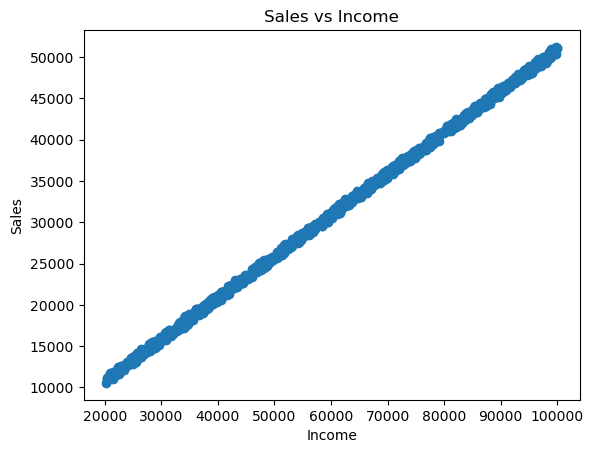

In [3]:
import matplotlib.pyplot as plt

# Visualize the relationship between 'Sales' and 'Income'
plt.scatter(dataset['Income'], dataset['Sales'])
plt.title('Sales vs Income')
plt.xlabel('Income')
plt.ylabel('Sales')
plt.show()


In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Select important features
selected_features = ['Age', 'Gender','Income', 'Product_Category','Promotion']

# Update X with selected features
X = dataset[selected_features]

# Perform label encoding for 'Product_Category'
label_encoder = LabelEncoder()
label_encoder1 = LabelEncoder()
label_encoder2 = LabelEncoder()

X['Product_Category'] = label_encoder.fit_transform(X['Product_Category'])

X['Promotion'] = label_encoder1.fit_transform(X['Promotion'])
X['Gender'] = label_encoder2.fit_transform(X['Gender'])

# Train a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, dataset['Sales'])

import pickle

with open('trained_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

C:\Users\kadam\AppData\Local\Temp\ipykernel_11084\3978325534.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Product_Category'] = label_encoder.fit_transform(X['Product_Category'])
C:\Users\kadam\AppData\Local\Temp\ipykernel_11084\3978325534.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Promotion'] = label_encoder1.fit_transform(X['Promotion'])
C:\Users\kadam\AppData\Local\Temp\ipykernel_11084\3978325534.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [5]:
from flask import Flask, render_template, request
import pandas as pd

app = Flask(__name__)

# Render the homepage with the input form
@app.route('/')
def home():
    return render_template('index.html')

# Make predictions based on user input
@app.route('/predict', methods=['POST'])
def predict():
    # Get input values from the HTML form
    age = float(request.form['age'])
    income = float(request.form['income'])
    product_category = request.form['product_category']
    gender = request.form['gender']
    promotion = request.form['promotion']

    # Perform label encoding for 'Product_Category', 'Gender', and 'Promotion'
    product_category_encoded = label_encoder.transform([product_category])[0]
    gender_encoded = label_encoder2.transform([gender])[0]
    promotion_encoded = label_encoder1.transform([promotion])[0]

    # Make prediction using the trained model
    input_data = pd.DataFrame([[age, gender_encoded,income,product_category_encoded,promotion_encoded]], columns=['Age', 'Gender',  'Income', 'Product_Category','Promotion'])
    prediction = model.predict(input_data)[0]

    return render_template('result.html', prediction=prediction)

# # Make predictions based on user input
# @app.route('/predict', methods=['POST'])
# def predict():
#     # Get input values from the HTML form
#     age = float(request.form['age'])
#     income = float(request.form['income'])
#     product_category = request.form['product_category']
# #     gender = request.form['gender']
# #     promotion = request.form['promotion']

#     # Perform label encoding for 'Product_Category'
#     product_category_encoded = label_encoder.transform([product_category])[0]
# #     gender_encoded = label_encoder.transform([gender])[0]
# #     promotion_encoded = label_encoder.transform([promotion])[0]

#     # Make prediction using the trained model
#     input_data = pd.DataFrame([[age,income, product_category_encoded]], columns=selected_features)
#     prediction = model.predict(input_data)[0]

#     return render_template('result.html', prediction=prediction)

from werkzeug.serving import run_simple
run_simple('localhost', 5000, app)

# if __name__ == '__main__':
#     app.run(debug=True)


 * Running on http://localhost:5000
Press CTRL+C to quit
127.0.0.1 - - [12/Apr/2024 20:27:37] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [12/Apr/2024 20:28:06] "POST /predict HTTP/1.1" 200 -
